# Comparing Changes 

### US/Mexico level 2  - municipios and counties

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df = gpd.read_parquet("../../geoplanar/datasets/usmex/usmex_2.parquet")

In [3]:
df2 = gpd.read_parquet("../../geoplanar/datasets/usmex/final_usmex2.parquet")

In [4]:
df.head()

index GID_0         NAME_0    GID_1   NAME_1 NL_NAME_1      GID_2   NAME_2  \
0      0   USA  United States  USA.1_1  Alabama      None  USA.1.1_1  Autauga   
1      1   USA  United States  USA.1_1  Alabama      None  USA.1.2_1  Baldwin   
2      2   USA  United States  USA.1_1  Alabama      None  USA.1.3_1  Barbour   
3      3   USA  United States  USA.1_1  Alabama      None  USA.1.4_1     Bibb   
4      4   USA  United States  USA.1_1  Alabama      None  USA.1.5_1   Blount   

  VARNAME_2 NL_NAME_2  ... ADM2_REF ADM2ALT1ES ADM2ALT2ES ADM1_ES ADM1_PCODE  \
0      None      None  ...     None       None       None    None       None   
1      None      None  ...     None       None       None    None       None   
2      None      None  ...     None       None       None    None       None   
3      None      None  ...     None       None       None    None       None   
4      None      None  ...     None       None       None    None       None   

  ADM0_ES  ADM0_PCODE  date validOn validTo  
0    None        None  None    None    None  
1    None        None  None    None    None  
2    None        None  None    None    None  
3    None        None  None    None    None  
4    None        None  None    None    None  

[5 rows x 30 columns]

In [5]:
df2.head()

index GID_0         NAME_0    GID_1   NAME_1 NL_NAME_1      GID_2   NAME_2  \
0      0   USA  United States  USA.1_1  Alabama      None  USA.1.1_1  Autauga   
1      1   USA  United States  USA.1_1  Alabama      None  USA.1.2_1  Baldwin   
2      2   USA  United States  USA.1_1  Alabama      None  USA.1.3_1  Barbour   
3      3   USA  United States  USA.1_1  Alabama      None  USA.1.4_1     Bibb   
4      4   USA  United States  USA.1_1  Alabama      None  USA.1.5_1   Blount   

  VARNAME_2 NL_NAME_2  ... ADM2_REF ADM2ALT1ES ADM2ALT2ES ADM1_ES ADM1_PCODE  \
0      None      None  ...     None       None       None    None       None   
1      None      None  ...     None       None       None    None       None   
2      None      None  ...     None       None       None    None       None   
3      None      None  ...     None       None       None    None       None   
4      None      None  ...     None       None       None    None       None   

  ADM0_ES  ADM0_PCODE  date validOn validTo  
0    None        None  None    None    None  
1    None        None  None    None    None  
2    None        None  None    None    None  
3    None        None  None    None    None  
4    None        None  None    None    None  

[5 rows x 30 columns]

## Changes in Centroids

In [6]:
old_cen = df.centroid
old_cen.head()

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-86.64291 32.53552)
1    POINT (-87.72492 30.73627)
2    POINT (-85.39544 31.86980)
3    POINT (-87.12638 32.99865)
4    POINT (-86.56797 33.98158)
dtype: geometry

In [7]:
new_cen = df2.centroid
new_cen.head()

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-86.64291 32.53552)
1    POINT (-87.72492 30.73627)
2    POINT (-85.39544 31.86980)
3    POINT (-87.12638 32.99865)
4    POINT (-86.56797 33.98158)
dtype: geometry

In [8]:
df.iloc[81]

index                                                       107
GID_0                                                       USA
NAME_0                                            United States
GID_1                                                   USA.3_1
NAME_1                                                  Arizona
NL_NAME_1                                                  None
GID_2                                                USA.3.15_1
NAME_2                                                     Yuma
VARNAME_2                                                  None
NL_NAME_2                                                  None
TYPE_2                                                   County
ENGTYPE_2                                                County
CC_2                                                       None
HASC_2                                                 US.AZ.YU
geometry      POLYGON ((-114.81327819824219 32.4949111938477...
COUNTRY                                 

In [9]:
df2.iloc[81]

index                                                       107
GID_0                                                       USA
NAME_0                                            United States
GID_1                                                   USA.3_1
NAME_1                                                  Arizona
NL_NAME_1                                                  None
GID_2                                                USA.3.15_1
NAME_2                                                     Yuma
VARNAME_2                                                  None
NL_NAME_2                                                  None
TYPE_2                                                   County
ENGTYPE_2                                                County
CC_2                                                       None
HASC_2                                                 US.AZ.YU
geometry      POLYGON ((-114.81487274169922 32.5032806396484...
COUNTRY                                 

In [10]:
print(old_cen.iloc[81]) # old Yuma County (AZ) centroid

POINT (-113.90406028872228 32.77089825508747)


In [11]:
print(new_cen.iloc[81]) # new Yuma County (AZ) centroid

POINT (-113.90406028872226 32.770898255087445)


<AxesSubplot:>

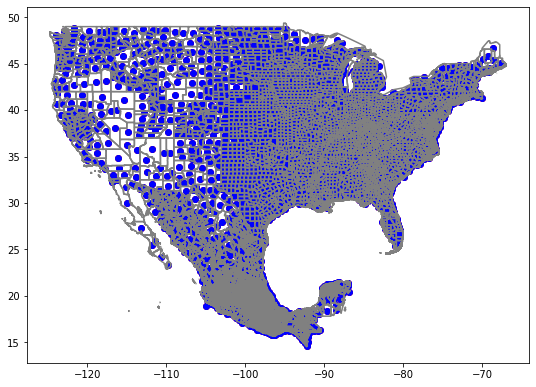

In [12]:
base = df2.geometry.boundary.plot(edgecolor='grey', figsize=(9, 9))
old_cen.plot(ax=base, color='red')
new_cen.plot(ax=base, color='blue')

In [13]:
import folium
# old centroids
m = old_cen.explore(
     color='red',
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     name = 'Old Centroids'
)

# new centroids
new_cen.explore(
     m=m, # pass the map object
     color='blue',
     tooltip=False,
     name = 'New Centroids'
)

folium.LayerControl().add_to(m)  # layer control

m # execute the map

### Comparing old and new centroids
We will use the different geom comparsions that GeoPandas has to spot the differences in centroids

In [14]:
# geom_equals
df2['equals'] = old_cen.geom_equals(new_cen, align=False) 

# geom_almost_equals with 5 decimals
df2['almost_equals'] = old_cen.geom_almost_equals(new_cen, decimal=5)

#  geom_almost_equals with all of centroid decimals
df2['almost_equals_full'] = old_cen.geom_almost_equals(new_cen, decimal=14)

# geom_equals_exact with .00001 tolerance
df2['equals_exact'] = old_cen.geom_equals_exact(new_cen, tolerance=.00001, align=False)

In [15]:
df2

index GID_0         NAME_0    GID_1   NAME_1 NL_NAME_1      GID_2  \
0         0   USA  United States  USA.1_1  Alabama      None  USA.1.1_1   
1         1   USA  United States  USA.1_1  Alabama      None  USA.1.2_1   
2         2   USA  United States  USA.1_1  Alabama      None  USA.1.3_1   
3         3   USA  United States  USA.1_1  Alabama      None  USA.1.4_1   
4         4   USA  United States  USA.1_1  Alabama      None  USA.1.5_1   
...     ...   ...            ...      ...      ...       ...        ...   
5569   2452  None           None     None     None      None       None   
5570   2453  None           None     None     None      None       None   
5571   2454  None           None     None     None      None       None   
5572   2455  None           None     None     None      None       None   
5573   2456  None           None     None     None      None       None   

       NAME_2 VARNAME_2 NL_NAME_2  ... ADM1_PCODE ADM0_ES ADM0_PCODE  \
0     Autauga      None      None  ...       None    None       None   
1     Baldwin      None      None  ...       None    None       None   
2     Barbour      None      None  ...       None    None       None   
3        Bibb      None      None  ...       None    None       None   
4      Blount      None      None  ...       None    None       None   
...       ...       ...       ...  ...        ...     ...        ...   
5569     None      None      None  ...       MX21  México         MX   
5570     None      None      None  ...       MX21  México         MX   
5571     None      None      None  ...       MX30  México         MX   
5572     None      None      None  ...       MX15  México         MX   
5573     None      None      None  ...       MX15  México         MX   

            date     validOn validTo  equals  almost_equals  \
0           None        None    None    True           True   
1           None        None    None   False           True   
2           None        None    None   False           True   
3           None        None    None    True           True   
4           None        None    None   False           True   
...          ...         ...     ...     ...            ...   
5569  2020-06-23  2021-06-18    None   False           True   
5570  2020-06-23  2021-06-18    None   False           True   
5571  2020-06-23  2021-06-18    None   False           True   
5572  2020-06-23  2021-06-18    None   False           True   
5573  2020-06-23  2021-06-18    None   False           True   

     almost_equals_full equals_exact  
0                  True         True  
1                 False         True  
2                 False         True  
3                  True         True  
4                 False         True  
...                 ...          ...  
5569              False         True  
5570              False         True  
5571              False         True  
5572              False         True  
5573              False         True  

[5574 rows x 34 columns]

In [16]:
df2.groupby(['equals']).size()

equals
False    4347
True     1227
dtype: int64

In [17]:
df2.loc[df2['equals'] == False] # all states that changed based on geom_equals

index GID_0         NAME_0    GID_1   NAME_1 NL_NAME_1      GID_2  \
1         1   USA  United States  USA.1_1  Alabama      None  USA.1.2_1   
2         2   USA  United States  USA.1_1  Alabama      None  USA.1.3_1   
4         4   USA  United States  USA.1_1  Alabama      None  USA.1.5_1   
5         5   USA  United States  USA.1_1  Alabama      None  USA.1.6_1   
6         6   USA  United States  USA.1_1  Alabama      None  USA.1.7_1   
...     ...   ...            ...      ...      ...       ...        ...   
5569   2452  None           None     None     None      None       None   
5570   2453  None           None     None     None      None       None   
5571   2454  None           None     None     None      None       None   
5572   2455  None           None     None     None      None       None   
5573   2456  None           None     None     None      None       None   

       NAME_2 VARNAME_2 NL_NAME_2  ... ADM1_PCODE ADM0_ES ADM0_PCODE  \
1     Baldwin      None      None  ...       None    None       None   
2     Barbour      None      None  ...       None    None       None   
4      Blount      None      None  ...       None    None       None   
5     Bullock      None      None  ...       None    None       None   
6      Butler      None      None  ...       None    None       None   
...       ...       ...       ...  ...        ...     ...        ...   
5569     None      None      None  ...       MX21  México         MX   
5570     None      None      None  ...       MX21  México         MX   
5571     None      None      None  ...       MX30  México         MX   
5572     None      None      None  ...       MX15  México         MX   
5573     None      None      None  ...       MX15  México         MX   

            date     validOn validTo  equals  almost_equals  \
1           None        None    None   False           True   
2           None        None    None   False           True   
4           None        None    None   False           True   
5           None        None    None   False           True   
6           None        None    None   False           True   
...          ...         ...     ...     ...            ...   
5569  2020-06-23  2021-06-18    None   False           True   
5570  2020-06-23  2021-06-18    None   False           True   
5571  2020-06-23  2021-06-18    None   False           True   
5572  2020-06-23  2021-06-18    None   False           True   
5573  2020-06-23  2021-06-18    None   False           True   

     almost_equals_full equals_exact  
1                 False         True  
2                 False         True  
4                 False         True  
5                 False         True  
6                 False         True  
...                 ...          ...  
5569              False         True  
5570              False         True  
5571              False         True  
5572              False         True  
5573              False         True  

[4347 rows x 34 columns]

In [18]:
df2.groupby(['almost_equals']).size()

almost_equals
False      24
True     5550
dtype: int64

In [19]:
df2.groupby(['almost_equals_full']).size()

almost_equals_full
False    4330
True     1244
dtype: int64

In [20]:
df2.groupby(['equals_exact']).size()

equals_exact
False      24
True     5550
dtype: int64

## Changes in Area

In [21]:
old_area = df
new_area = df2

In [22]:
old_area.to_crs(3857)
new_area.to_crs(3857)

index GID_0         NAME_0    GID_1   NAME_1 NL_NAME_1      GID_2  \
0         0   USA  United States  USA.1_1  Alabama      None  USA.1.1_1   
1         1   USA  United States  USA.1_1  Alabama      None  USA.1.2_1   
2         2   USA  United States  USA.1_1  Alabama      None  USA.1.3_1   
3         3   USA  United States  USA.1_1  Alabama      None  USA.1.4_1   
4         4   USA  United States  USA.1_1  Alabama      None  USA.1.5_1   
...     ...   ...            ...      ...      ...       ...        ...   
5569   2452  None           None     None     None      None       None   
5570   2453  None           None     None     None      None       None   
5571   2454  None           None     None     None      None       None   
5572   2455  None           None     None     None      None       None   
5573   2456  None           None     None     None      None       None   

       NAME_2 VARNAME_2 NL_NAME_2  ... ADM1_PCODE ADM0_ES ADM0_PCODE  \
0     Autauga      None      None  ...       None    None       None   
1     Baldwin      None      None  ...       None    None       None   
2     Barbour      None      None  ...       None    None       None   
3        Bibb      None      None  ...       None    None       None   
4      Blount      None      None  ...       None    None       None   
...       ...       ...       ...  ...        ...     ...        ...   
5569     None      None      None  ...       MX21  México         MX   
5570     None      None      None  ...       MX21  México         MX   
5571     None      None      None  ...       MX30  México         MX   
5572     None      None      None  ...       MX15  México         MX   
5573     None      None      None  ...       MX15  México         MX   

            date     validOn validTo  equals  almost_equals  \
0           None        None    None    True           True   
1           None        None    None   False           True   
2           None        None    None   False           True   
3           None        None    None    True           True   
4           None        None    None   False           True   
...          ...         ...     ...     ...            ...   
5569  2020-06-23  2021-06-18    None   False           True   
5570  2020-06-23  2021-06-18    None   False           True   
5571  2020-06-23  2021-06-18    None   False           True   
5572  2020-06-23  2021-06-18    None   False           True   
5573  2020-06-23  2021-06-18    None   False           True   

     almost_equals_full equals_exact  
0                  True         True  
1                 False         True  
2                 False         True  
3                  True         True  
4                 False         True  
...                 ...          ...  
5569              False         True  
5570              False         True  
5571              False         True  
5572              False         True  
5573              False         True  

[5574 rows x 34 columns]

In [23]:
old_area ["area"] = old_area['geometry'].area

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [24]:
print(old_area.area)

0       0.149917
1       0.399685
2       0.221918
3       0.156362
4       0.165045
          ...   
5569    0.001654
5570    0.023020
5571    0.005956
5572    0.017342
5573    0.019282
Length: 5574, dtype: float64


/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [25]:
new_area ["area"] = new_area['geometry'].area

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [26]:
print(new_area.area)

/Users/ecv/mambaforge/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0       0.149917
1       0.399685
2       0.221918
3       0.156362
4       0.165045
          ...   
5569    0.001654
5570    0.023020
5571    0.005956
5572    0.017342
5573    0.019282
Length: 5574, dtype: float64


In [27]:
new_area['area'].isin(old_area['area']).value_counts()


False    3763
True     1811
Name: area, dtype: int64

In [28]:
old_area.iloc[81].area # old Yuma County (AZ) area

1.3779336972802159

In [29]:
new_area.iloc[81].area # new Yuma County (AZ) area

1.377933697280216